# 📊 TikTok Engagement Analysis

Welcome to my data analysis project where I explore my personal TikTok usage patterns in relation to weather conditions and significant real-world events. This notebook walks through various datasets I decided to merge and visualize, that may influence my personal daily TikTok consumption.

## 🧩 Notebook Overview

This notebook is divided into 5 key parts:

1. **📱 Processing TikTok App Data**  
   - Extracted and cleaned raw data gathered from the TikTok app (e.g., watch history).
   - Prepared the data for engagement attributes like video count and estimated usage duration.

2. **☁️ Weather Data Integration**  
   - Weather data was preprocessed in advance using data collected via [Visual Crossing](https://www.visualcrossing.com/weather-query-builder/).
   - It includes key day-level metrics such as temperature, humidity, precipitation, and more.
   - Since it was already clean and complete, it required no additional processing in this notebook.

3. **📆 Processing Manually Collected Event Data**  
   - Gathered and processed key cultural, entertainment, and global events that may impact digital habits.
   - Includes things like award shows, religious events, and academic schedules.

4. **🔗 Merging All Data Sources**  
   - Combined TikTok, weather, and event data into one unified dataset.
   - In my TikTok data, the days I didn't watch anything have the value 0,
   - In my Weather data, there is no missing values,
   - In my events data, everything is gathered manually,
   - So as a result, I didn't have missing values.
5. **☀️ Weather Data Statistical Summary**  
   - Conducted an statistical analysis of weather-related variables, such as temperature, humidity, and precipitation.
   - Generated summary statistics like mean, median, and standard deviation to understand how different weather conditions vary over time.
   - This analysis served as a foundation for further exploration into how weather patterns might influence my TikTok usage.
6. **📈 Creating Visualizations**  
   - Generated visual plots/graphs to identify patterns or anomalies.
   - Explored potential correlations between various factors and TikTok consumption.
7. **🔍 Hypotheses and Results**  
   - Weather: Testing if weather conditions (like rain) increase usage.
   - Events: Testing if major events (e.g., award shows) drive usage.
   - Academics & Schedule: Testing if academic year & schedule on weekdays reduce usage.

8. **🔮 Prediction (Coming Soon) **  
   - Next Phase


---

# 📱 1. TikTok Data Preprocessing

In this section, I begin by loading my original TikTok data, which was obtained directly from the application’s data export. From the full dataset, I extract only the segments relevant to this project — particularly the **watch history**.

### 🔍 What I'm Measuring

To gain meaningful insights into my consumption, I focus on two main factors:

- **🎥 Number of Videos Watched**  
  Directly counted from the number of TikTok links in the watch history.

- **⏱️ Estimated Time Spent Watching**  
  Since the app does not provide exact viewing durations, I estimate time spent by assuming each video takes about **15 seconds** to watch. The total is then **converted into hours** by dividing the total seconds by 3600.

This approach allows me to estimate the total viewing time based on the number of videos watched.

---

In [1]:
import json
import pandas as pd

with open('/original_tikok_data.json', 'r') as file:
    data = json.load(file)

# Access the nested video list from TikTok Json file
video_list = data["Your Activity"]["Watch History"]["VideoList"]

df = pd.DataFrame(video_list)
df['Date'] = pd.to_datetime(df['Date']) #using dateTime

# getting just the date (not time, that's too detailed for now)
df['Day'] = df['Date'].dt.date

# Counting how many videos I watched per day
daily_usage = df.groupby('Day').size().reset_index(name='Videos Watched')

# Estimating the total time in hours (assuming 15 seconds per video)
daily_usage['TikTok Usage (Hours)'] = daily_usage['Videos Watched'] * 15 / 3600

daily_usage.to_csv('daily_tiktok_data.csv', index=False)
print(daily_usage.head())


          Day  Videos Watched  TikTok Usage (Hours)
0  2024-09-11             278              1.158333
1  2024-09-12              61              0.254167
2  2024-09-13             321              1.337500
3  2024-09-14             101              0.420833
4  2024-09-15             412              1.716667


---

# ☁️ 2. Weather Data

To understand how environmental conditions may influence my TikTok usage, I incorporated daily weather data into this project.

The data was collected using the [Visual Crossing Weather Query Builder](https://www.visualcrossing.com/weather-query-builder/), which provides detailed, day-level historical weather information.

### 📋 Key Attributes Included:

- `feelslike`: How the temperature feels in °C
- `precip`: Precipitation levels in mm
- `snow` & `snowdepth`: Snowfall and snow accumulation (if any)
- `cloudcover`: Cloud coverage as a percentage
- `uvindex`: UV exposure index
- `general`: A simplified label describing the overall weather condition (e.g., sunny, rainy, cloudy)

Here's a quick look at the structure of the dataset:

| datetime     | feelslike | precip | snow | snowdepth | cloudcover | uvindex | general           |
|--------------|-----------|--------|------|-----------|-------------|---------|-------------------|
| 2024-09-10   | 24.9      | 0      | 0    | 0         | 58.8        | 6       | partly-cloudy-day |
| 2024-09-11   | 25.7      | 8      | 0    | 0         | 53.0        | 6       | rain              |

### 🧼 Preprocessing Note

This dataset was **fully cleaned and preprocessed** before being used here:
- All fields are complete (no missing data).
- Dates are formatted properly for easy merging.
- Columns are already standardized and analysis-ready.

Because of this, there's no additional code or processing required in this step — the dataset is simply loaded and merged in the next section.

---


---

# 📅 3. Events Data Preprocessing

In this section, I processed a manually collected dataset of significant events, stored in a semicolon-separated CSV file. These events represent various cultural, academic, religious, and entertainment moments that may influence my digital behavior.

### 🛠️ Notes in Preprocessing

- The dataset is loaded with `sep=';'` because the default is a comma separator.
- The `Date` column is converted to a proper **datetime** object for easier temporal operations.
- Irrelevant columns such as `"TikTok Links"` and a duplicated `"Day"` column are removed to clean up the dataset.

### 📌 Types of Events

The event data is transformed into two main types:

1. **⏳ Countdown Events**  
   These represent how many days are left *until* or have passed *since* a specific event date. Examples include:
   - Grammy Awards
   - Oscar Awards
   - New Year's Day
   - Nowruz
   - National elections

2. **✅ Boolean Events**  
   These flag whether a particular event occurred on each date. For instance:
   - Paris Fashion Week (on specific dates)
   - Ramadan (spanning a date range)
   - UEFA Champions League match days
   - The academic school year
   - Weekday vs. weekend indicators

This allows me to analyse how factors like a global event or weekend — might affect my TikTok engagement.

---


In [2]:
import pandas as pd

# Loading the CSV using semicolon delimiter
df = pd.read_csv("/original_events_data.csv", delimiter=";")

# Convert the Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Remove "TikTok Links" from the data, because I will not be using them. Also there is a duplicate "Day" colmun, which I'm removing as well.
df = df.drop(columns=['Link', 'Day'], errors='ignore')

df.to_csv("info_corrected_events_data.csv", index=False, sep=';')

countdown_events = {
    '2025 Grammy Awards (Countdown)': pd.Timestamp('2025-02-03'),
    '2025 Oscar Awards (Countdown)': pd.Timestamp('2025-03-03'),
    '1404 Nowruz (Countdown)': pd.Timestamp('2025-03-21'),
    '2025 New Year (Countdown)': pd.Timestamp('2025-01-01'),
    '2024 United States presidential election (Countdown)': pd.Timestamp('2024-11-05'),
}
for column, date in countdown_events.items():
    df[column] = (date - df["Date"]).dt.days

# Boolean date ranges
df["2024 Paris Fashion Week (Bool)"] = df["Date"].between("2024-09-23", "2024-10-01").astype(int)
df["2025 Ramazan (Bool)"] = df["Date"].between("2025-03-01", "2025-03-29").astype(int)
df["24/25 School Year (Bool)"] = df["Date"].between("2024-09-23", "2025-06-04").astype(int)

# UEFA Champions League match dates
ucl_dates = [
    '2024-09-17', '2024-09-18', '2024-09-19',
    '2024-10-01', '2024-10-02', '2024-10-22', '2024-10-23',
    '2024-11-05', '2024-11-06', '2024-11-26', '2024-11-27',
    '2024-12-10', '2024-12-11',
    '2025-01-21', '2025-01-22', '2025-01-29',
    '2025-02-11', '2025-02-12', '2025-02-18', '2025-02-19',
    '2025-03-04', '2025-03-05', '2025-03-11', '2025-03-12'
]
ucl_dates = pd.to_datetime(ucl_dates)
df["24/25 UEFA Champions League (Bool)"] = df["Date"].isin(ucl_dates).astype(int)

# Weekday / Weekend
df["Weekday (Bool)"] = (df["Date"].dt.weekday < 5).astype(int)
df["Weekend (Bool)"] = (df["Date"].dt.weekday >= 5).astype(int)

df.to_csv("info_corrected_events_data.csv", index=False, sep=';')
print(df.head())

        Date  2025 Grammy Awards (Countdown)  2025 Oscar Awards (Countdown)  \
0 2024-09-11                             145                            173   
1 2024-09-12                             144                            172   
2 2024-09-13                             143                            171   
3 2024-09-14                             142                            170   
4 2024-09-15                             141                            169   

   2024 Paris Fashion Week (Bool)  2025 Ramazan (Bool)  \
0                               0                    0   
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    0   

   1404 Nowruz (Countdown)  2025 New Year (Countdown)  \
0                      191                        112   
1                      190                        111   
2    

---

### 🔄 Standardizing TikTok Data Format

Before merging all datasets, I thought it would be better all the files share the same structure — particularly the **delimiter** used in the CSV files.

By default, the TikTok data was saved using commas (`,`), whereas the other datasets use semicolons (`;`).  
To ensure consistency across all sources, I re-save the TikTok file with the correct delimiter.

This small adjustment helps avoid parsing issues during the final merge step.

---

In [3]:
tiktok_df = pd.read_csv('/content/daily_tiktok_data.csv', sep=',')

# Save the dataframe to a CSV with a semicolon separator this time
tiktok_df.to_csv('/content/changed_delimiter_daily_tiktok_data.csv', index=False, sep=';')


---

# 🔗 4. Merging All Data Sources

In this step, I combine the cleaned and preprocessed datasets into a single DataFrame for analysis.

### 📋 Datasets

- **TikTok Daily Data**: Contains the number of videos watched and estimated usage time per day.
- **Weather Data**: Collected via an API and includes daily weather features such as temperature, humidity, etc.
- **Events Data**: Manually gathered dataset that includes countdowns and boolean values for significant events and dates.

### ⚙️ How the Merge Works

1. All datasets are aligned using a common column: **`Day`**.
2. The merge is done using a left join.
3. The final merged dataset is saved as a CSV file named:  
   `merged_tiktok_weather_events.csv`

This merged file will be used in the next steps to make visualizations and run analyses that explore how factors (like weather or global events) may influence my daily TikTok behavior.

---

In [4]:
import pandas as pd

tiktok_df = pd.read_csv('/content/changed_delimiter_daily_tiktok_data.csv', sep=';')

tiktok_df['Day'] = pd.to_datetime(tiktok_df['Day'])

weather_df = pd.read_csv('/original_weather_data.csv', sep=';')
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
weather_df.rename(columns={'datetime': 'Day'}, inplace=True)

merged_df = pd.merge(tiktok_df, weather_df, on='Day', how='left')

events_df = pd.read_csv('/content/info_corrected_events_data.csv', sep=';')
events_df.rename(columns={'Date': 'Day'}, inplace=True)
events_df['Day'] = pd.to_datetime(events_df['Day'])

full_merged_df = pd.merge(merged_df, events_df, on='Day', how='left')

# Save to CSV
full_merged_df.to_csv('merged_tiktok_weather_events.csv', index=False)
print(full_merged_df.head())


         Day  Videos Watched  TikTok Usage (Hours)  feelslike  precip  snow  \
0 2024-09-11             278              1.158333       25.7     8.0   0.0   
1 2024-09-12              61              0.254167       25.5    16.0   0.0   
2 2024-09-13             321              1.337500       26.1     0.0   0.0   
3 2024-09-14             101              0.420833       27.0     0.0   0.0   
4 2024-09-15             412              1.716667       23.5   938.0   0.0   

   snowdepth  cloudcover  uvindex            general  ...  \
0        0.0        53.0        6               rain  ...   
1        0.0        40.3        7               rain  ...   
2        0.0        17.1        7          clear-day  ...   
3        0.0        43.3        7  partly-cloudy-day  ...   
4        0.0        66.7        4               rain  ...   

   2025 Oscar Awards (Countdown)  2024 Paris Fashion Week (Bool)  \
0                          173.0                             0.0   
1                     

# 📊 5. Weather Data Statistical Summary

### Descriptive Statistics:
1.   Mean
2.   Standard Deviation
3.   Min/Max
4.   25%, 50%, 75% Quartiles

### ✅ Output:
Numeric summary for all columns.

---

In [44]:
import pandas as pd

# Dictionary for weather data
data = {
    'datetime': ['2024-09-10', '2024-09-11'],
    'feelslike': [24.9, 25.7],
    'precip': [0, 8],
    'snow': [0, 0],
    'snowdepth': [0, 0],
    'cloudcover': [58.8, 53],
    'uvindex': [6, 6],
    'general': ['partly-cloudy-day', 'rain']
}

df = pd.DataFrame(data)
df['datetime'] = pd.to_datetime(df['datetime'])

# Statistics calculated
stats = df.describe()
print(stats)


                  datetime  feelslike    precip  snow  snowdepth  cloudcover  \
count                    2   2.000000  2.000000   2.0        2.0    2.000000   
mean   2024-09-10 12:00:00  25.300000  4.000000   0.0        0.0   55.900000   
min    2024-09-10 00:00:00  24.900000  0.000000   0.0        0.0   53.000000   
25%    2024-09-10 06:00:00  25.100000  2.000000   0.0        0.0   54.450000   
50%    2024-09-10 12:00:00  25.300000  4.000000   0.0        0.0   55.900000   
75%    2024-09-10 18:00:00  25.500000  6.000000   0.0        0.0   57.350000   
max    2024-09-11 00:00:00  25.700000  8.000000   0.0        0.0   58.800000   
std                    NaN   0.565685  5.656854   0.0        0.0    4.101219   

       uvindex  
count      2.0  
mean       6.0  
min        6.0  
25%        6.0  
50%        6.0  
75%        6.0  
max        6.0  
std        0.0  


---

# 📊 6. Visual Exploration of TikTok Usage Patterns

In this section, I begin analyzing the merged dataset through a series of exploratory visualizations. The goal is to find potential patterns and relationships between my TikTok activity and a variety of external factors such as weather, time context (weekday/weekend), school calendar, and major global events.

This stage is **exploratory in nature** and sets the foundation for deeper analysis later on.

Each visualization helps to go over my hypotheses about how external factors might shape or influence my digital behavior.


---

## 🔧 Setup: Load Libraries and Dataset

First, we import necessary libraries and load the merged dataset.

---


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading my dataset
df = pd.read_csv('/content/merged_tiktok_weather_events.csv')
df['Day'] = pd.to_datetime(df['Day'])

# Some styling details
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

## 📈 TikTok Usage Trends Over Time
How has my TikTok usage changed throughout the semester?
This line graph shows the daily usage in hours.⏳📱

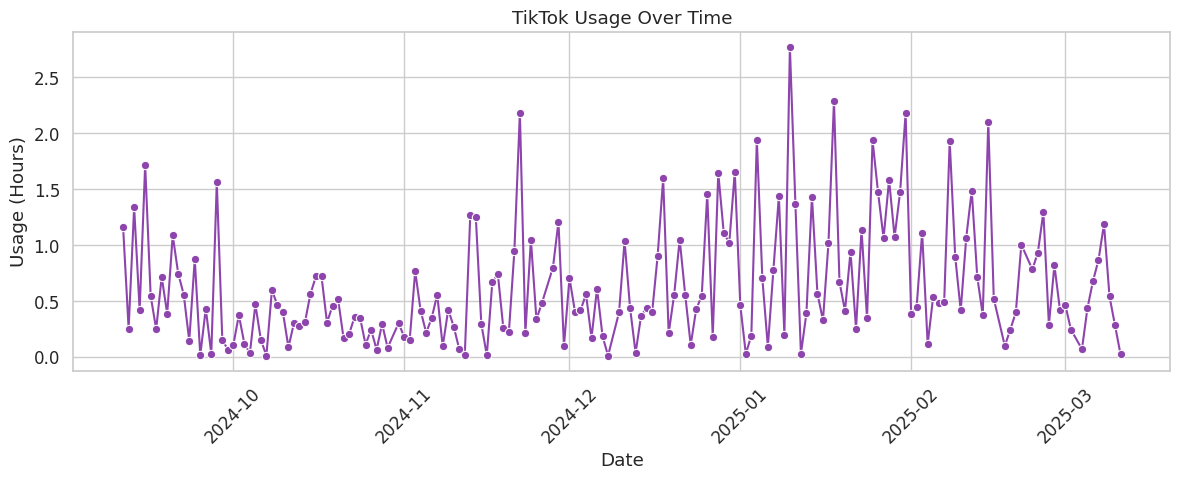

In [27]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Day', y='TikTok Usage (Hours)', data=df, marker='o', color='#8e44ad')

plt.title("TikTok Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Usage (Hours)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🔍 General Correlation with TikTok Usage
What factors are most strongly correlated with my TikTok usage? 📊🔍


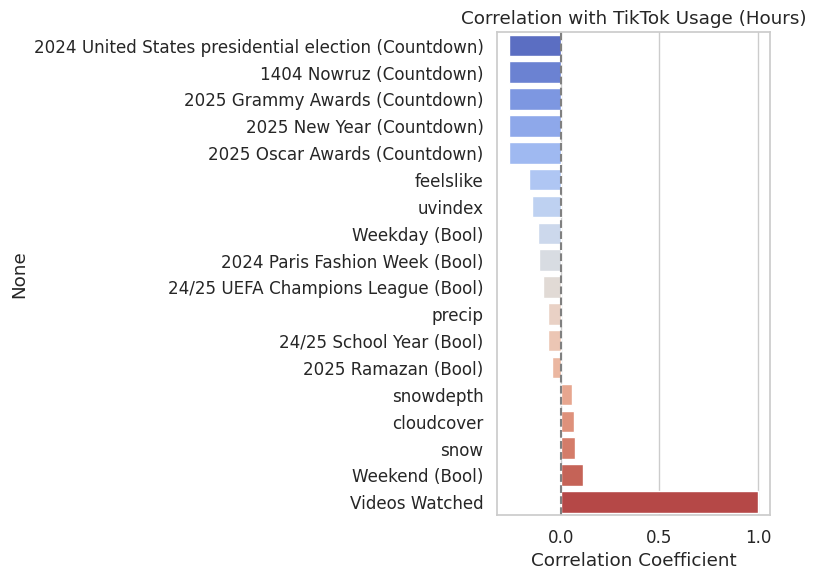

In [8]:
# Correlations with TikTok Usage (used .corr())
corr_series = df.corr(numeric_only=True)['TikTok Usage (Hours)'].drop('TikTok Usage (Hours)')
corr_series = corr_series.sort_values()


# Horizontal bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_series.values, y=corr_series.index, hue=corr_series.index, palette='coolwarm', orient='h', legend=False)
plt.title("Correlation with TikTok Usage (Hours)")
plt.xlabel("Correlation Coefficient")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


## 🌦️ TikTok Usage with Detailed Weather Features
How do weather conditions impact my TikTok usage?
These scatter plots show the relationship between various weather features (such as temperature, precipitation, snow, and UV index) and my TikTok consumption. 🌧️🌞📱

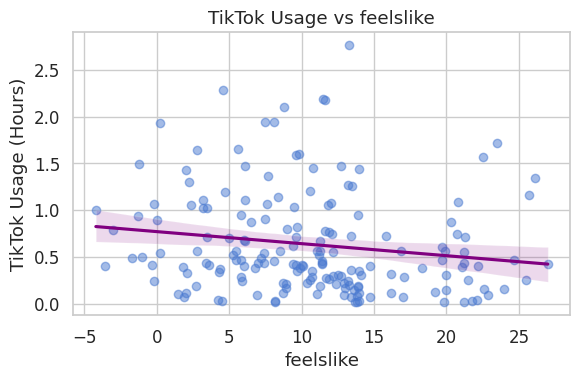

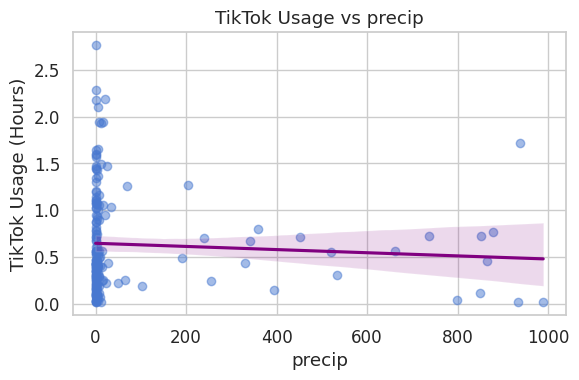

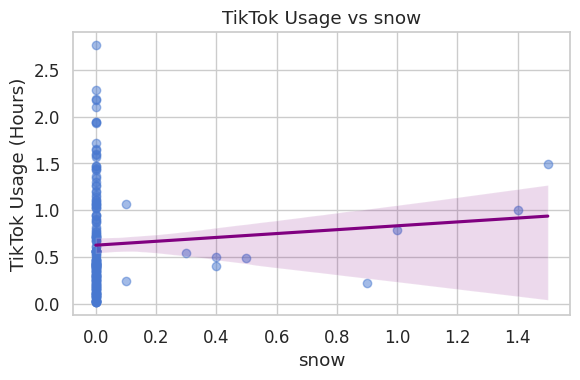

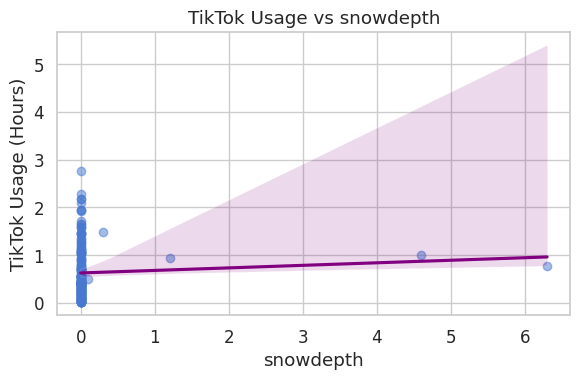

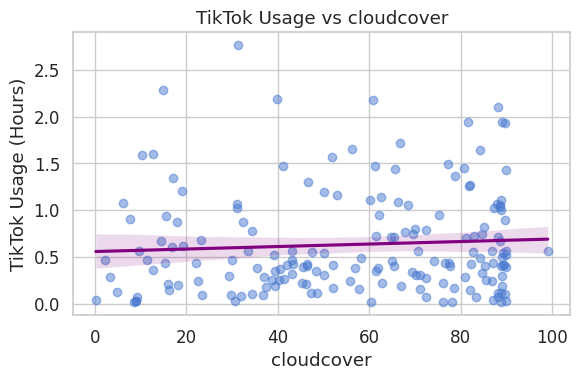

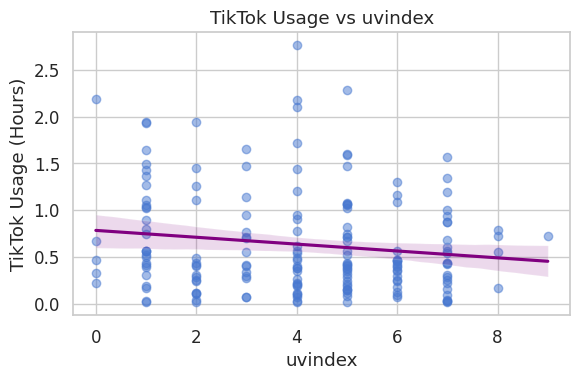

In [9]:
features = ['feelslike', 'precip', 'snow', 'snowdepth', 'cloudcover', 'uvindex']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=col, y='TikTok Usage (Hours)', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'purple'})
    plt.title(f"TikTok Usage vs {col}")
    plt.tight_layout()
    plt.show()


## ☀️🌧️ TikTok Usage by General Weather Type
This box plot illustrates how TikTok usage varies across different weather conditions. It shows the distribution of TikTok usage hours for each general weather type, helping to identify patterns in usage based on weather.

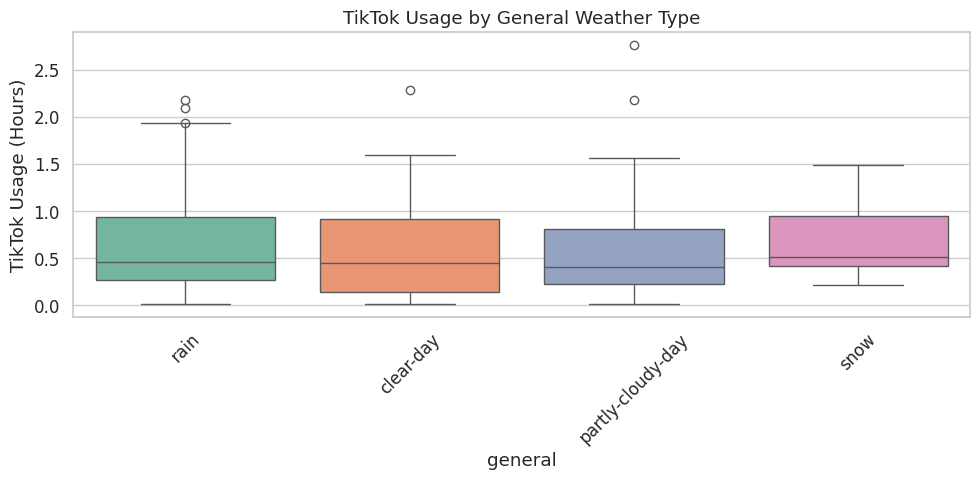

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='general', y='TikTok Usage (Hours)', data=df, hue='general', palette='Set2', legend=False)

plt.xticks(rotation=45)
plt.title("TikTok Usage by General Weather Type")

plt.tight_layout()
plt.show()


## 🎓 Academic Influence on Usage

Is my TikTok usage affected by school year?

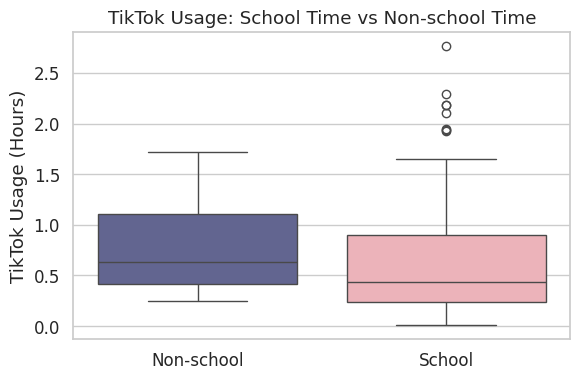

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='24/25 School Year (Bool)', y='TikTok Usage (Hours)', data=df,
            palette=['#5B5F97', '#F6A9B3'], hue='24/25 School Year (Bool)', legend=False)

plt.title("TikTok Usage: School Time vs Non-school Time")
plt.xticks([0, 1], ['Non-school', 'School'])
plt.xlabel("")

plt.tight_layout()
plt.show()


## 📆 Weekday vs Weekend TikTok Patterns

Do weekends have more TikTok engagement?


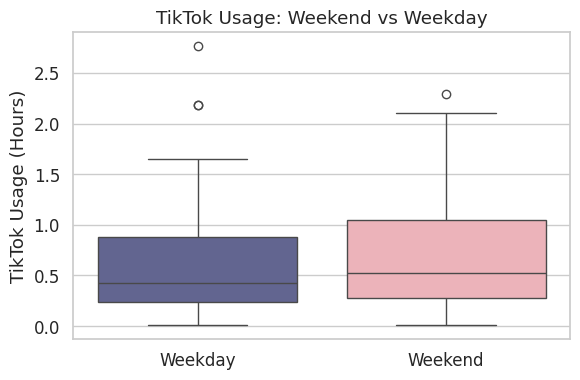

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Weekend (Bool)', y='TikTok Usage (Hours)', data=df,
            palette=['#5B5F97', '#F6A9B3'], hue='Weekend (Bool)', legend=False)

plt.title("TikTok Usage: Weekend vs Weekday")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.xlabel("")

plt.tight_layout()
plt.show()


## 🗼Paris Fashion Week Effect
Is TikTok usage affected by fashion events?

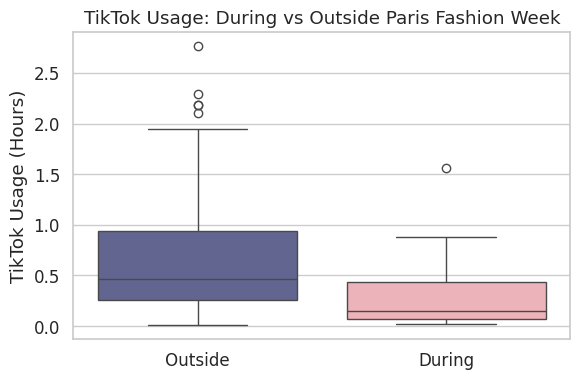

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='2024 Paris Fashion Week (Bool)', y='TikTok Usage (Hours)', data=df,
            palette=['#5B5F97', '#F6A9B3'], hue='2024 Paris Fashion Week (Bool)', legend=False)

plt.title("TikTok Usage: During vs Outside Paris Fashion Week")
plt.xticks([0, 1], ['Outside', 'During'])
plt.xlabel("")

plt.tight_layout()
plt.show()


## 🕌 Ramazan
How does the month of Ramazan affect my screen time?

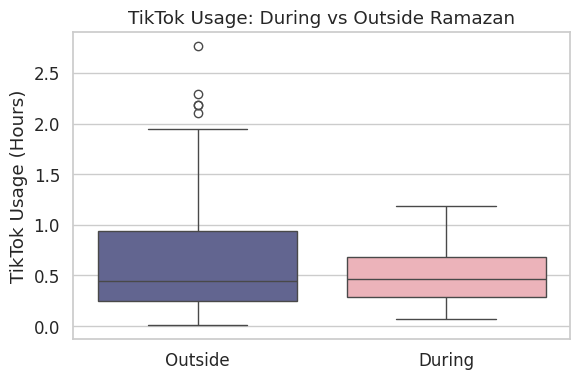

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='2025 Ramazan (Bool)', y='TikTok Usage (Hours)', data=df,
            palette=['#5B5F97', '#F6A9B3'], hue='2025 Ramazan (Bool)', legend=False)

plt.title("TikTok Usage: During vs Outside Ramazan")
plt.xticks([0, 1], ['Outside', 'During'])
plt.xlabel("")

plt.tight_layout()
plt.show()


## ⚽ Champions League
Do UEFA Champions League match days change my scrolling patterns?

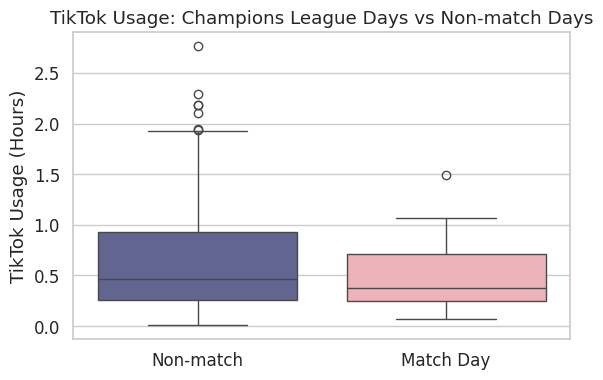

In [14]:
plt.figure(figsize=(6, 4))

#add colors as well :D
sns.boxplot(x='24/25 UEFA Champions League (Bool)', y='TikTok Usage (Hours)', data=df,
            palette=['#5B5F97', '#F6A9B3'], hue='24/25 UEFA Champions League (Bool)', legend=False)

plt.title("TikTok Usage: Champions League Days vs Non-match Days")
plt.xticks([0, 1], ['Non-match', 'Match Day'])

plt.xlabel("")

plt.tight_layout()
plt.show()


## 📊Comparing All Boolean Features Together in One Plot

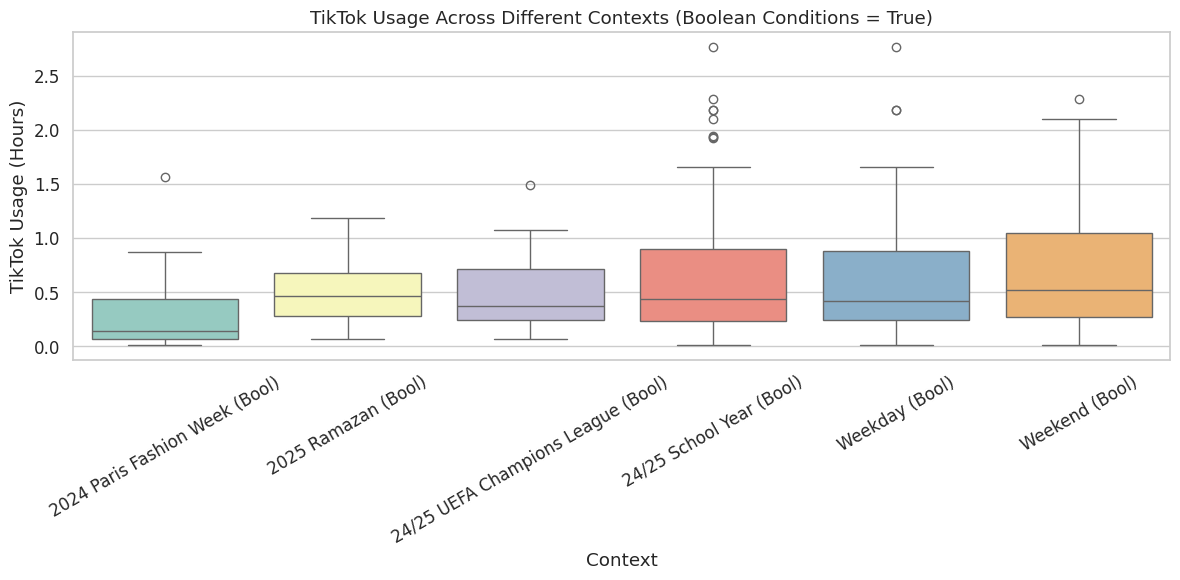

In [41]:
#Bool events
bool_cols = [
    '2024 Paris Fashion Week (Bool)', '2025 Ramazan (Bool)', '24/25 UEFA Champions League (Bool)',
    '24/25 School Year (Bool)', 'Weekday (Bool)', 'Weekend (Bool)'
]

#easier comparison
df_melted = df.melt(id_vars='TikTok Usage (Hours)',
                    value_vars=bool_cols,
                    var_name='Context',
                    value_name='isTrue')

# Only rows that are True
df_melted = df_melted[df_melted['isTrue'] == 1]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Context', y='TikTok Usage (Hours)', data=df_melted, hue='Context', palette='Set3', legend=False)

plt.xticks(rotation=30)
plt.title("TikTok Usage Across Different Contexts (Boolean Conditions = True)")

plt.tight_layout()
plt.show()


## 🌍 Global Events: Do Significant International Moments Impact My Usage?

We analyze whether my engagement increases as global countdown events (like award shows or Nowruz) approach.


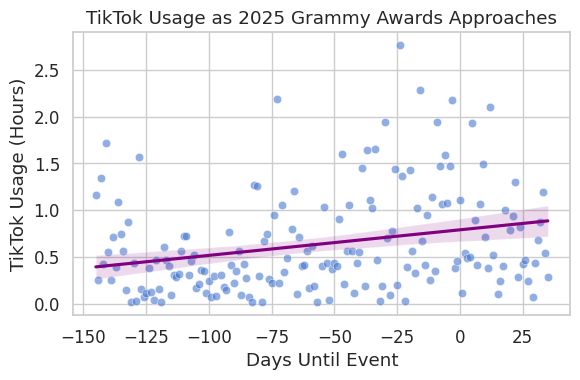

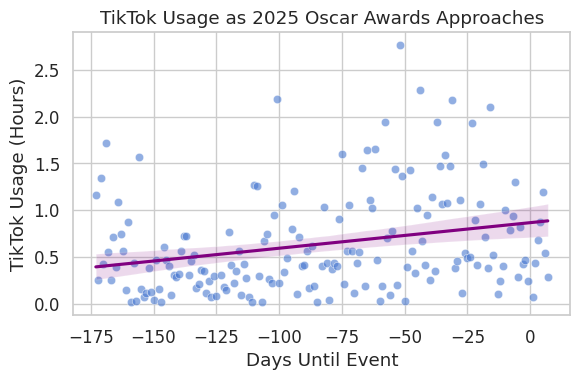

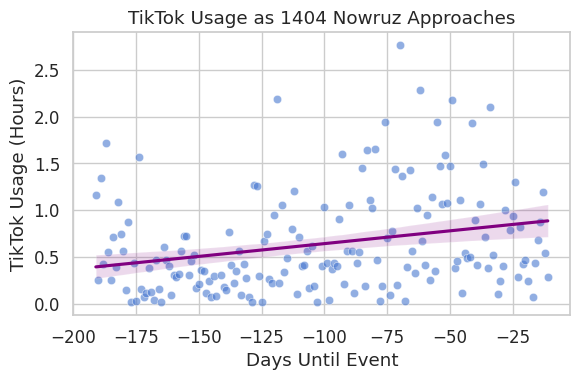

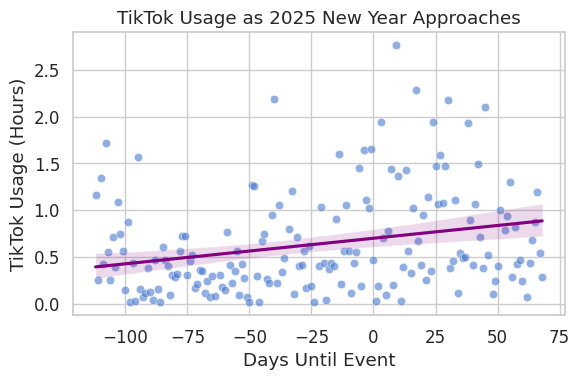

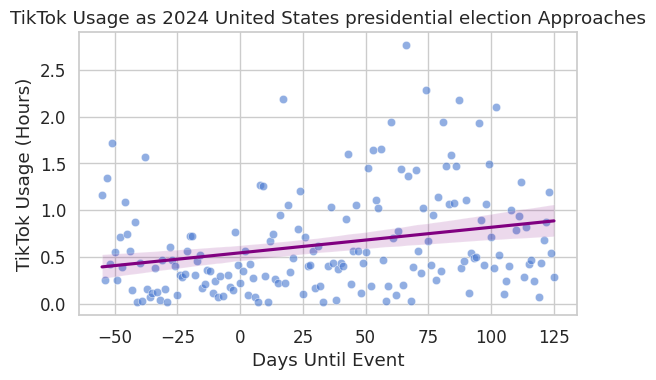

In [42]:
#list of events with countdowns
event_countdowns = [
    '2025 Grammy Awards (Countdown)',
    '2025 Oscar Awards (Countdown)',
    '1404 Nowruz (Countdown)',
    '2025 New Year (Countdown)',
    '2024 United States presidential election (Countdown)'
]

for col in event_countdowns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=-df[col], y='TikTok Usage (Hours)', alpha=0.6)
    sns.regplot(data=df, x=-df[col], y='TikTok Usage (Hours)', scatter=False, color='purple')


    plt.title(f"TikTok Usage as {col.replace('(Countdown)', '').strip()} Approaches")
    plt.xlabel("Days Until Event")
    plt.ylabel("TikTok Usage (Hours)")


    plt.tight_layout()
    plt.show()


## 📅 Countdown Events & TikTok Usage (Another type of graph)


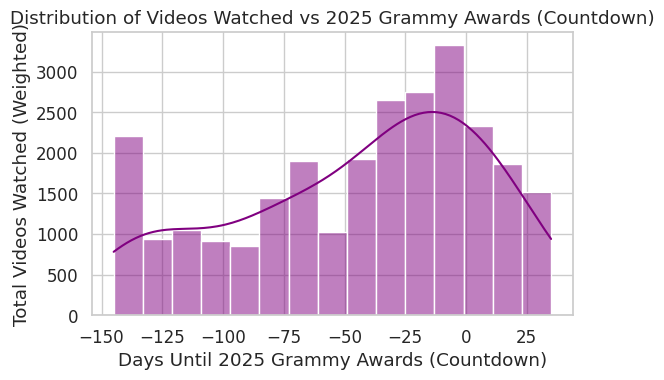

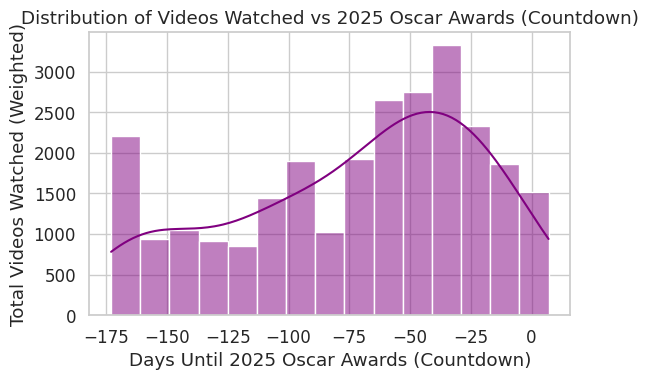

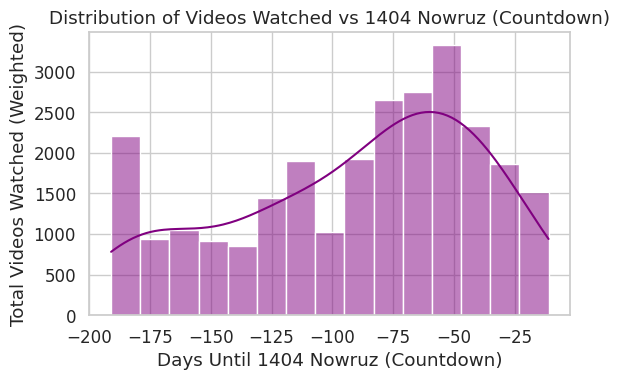

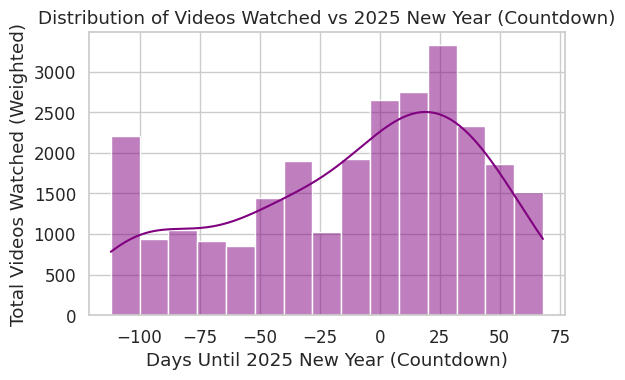

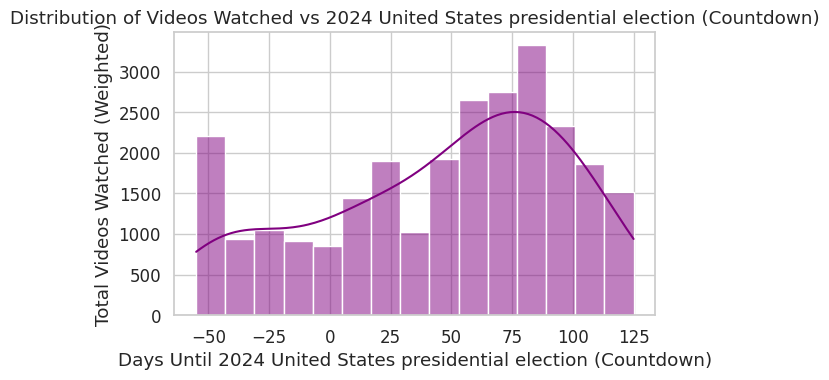

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# (events with countdowns)
countdown_features = [
    '2025 Grammy Awards (Countdown)', '2025 Oscar Awards (Countdown)',
    '1404 Nowruz (Countdown)', '2025 New Year (Countdown)',
    '2024 United States presidential election (Countdown)'
]

# Adjusting the countdown data to represent the number of days remaining by multiplying by -1
df[countdown_features] = df[countdown_features] * -1

for col in countdown_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, weights='Videos Watched', bins=15, kde=True, color='purple')

    plt.title(f'Distribution of Videos Watched vs {col}')
    plt.xlabel(f'Days Until {col}')
    plt.ylabel('Total Videos Watched (Weighted)')


    plt.tight_layout()
    plt.show()


# 🔍 7. Hypotheses and Results

I tested several hypotheses to explore how different factors may influence my TikTok usage. The goal was to validate potential correlations between external influences (such as weather, events, and academic schedules) and my engagement with TikTok. Here are the hypotheses and their results:

## 📅 Day
- **H1:** TikTok usage may follow a time trend over the semester (increasing or decreasing gradually).  
  **Result:** It did in fact show a lot of fluctuations.

## ⏱️ TikTok Usage (Hours)
- **H2:** TikTok usage is influenced by personal habits, external events, and environmental factors.  
  **Result:** Even if not always strong correlations, it seems there are effects of the factors.

## 🌡️ Temperature Feels Like
- **H3:** Lower temperatures lead to higher TikTok usage, as I prefer staying indoors.  
  **Result:** It is observed that I spend more time when the temperature is between 10–15°C.

## 🌧️❄️☁️ Precipitation, Snow, Snow Depth, UV Index
- **H4:** Rainy/snowy days are associated with increased TikTok usage.  
  **Result:** No strong correlation found.

## 🎵 2025 Grammy Awards (Countdown)
- **H5:** TikTok usage increases near major music events due to trending content and artists.  
  **Result:** It is observed that I spend more time when the event is closer.

## 🎬 2025 Oscar Awards (Countdown)
- **H6:** Usage increases around the Oscars.  
  **Result:** It is observed that I spend more time when the event is closer.

## 👗 2025 Paris Fashion Week (Bool)
- **H7:** TikTok usage may increase during Fashion Week.  
  **Result:** It is observed that I spend more time when the event is closer.

## 🕌 2025 Ramazan (Bool)
- **H8:** TikTok usage may increase during Ramazan.  
  **Result:** No strong correlation found.

## 🎉 1404 Nowruz (Countdown)
- **H9:** Leading up to Nowruz, TikTok usage may increase due to cultural or celebratory content.  
  **Result:** It is observed that I spend more time when the event is closer.

## 🎊 2025 New Year (Countdown)
- **H10:** TikTok usage may increase around New Year’s Day.  
  **Result:** It is observed that I spend more time when the event is closer.

## 🗳️ 2024 United States Presidential Election (Countdown)
- **H11:** Usage may increase during this period.  
  **Result:** No strong correlation found.

## ⚽ 24/25 UEFA Champions League (Bool)
- **H12:** Matches or finals may influence TikTok usage.  
  **Result:** It is observed that I spend more time on the match days.

## 🎓 24/25 School Year (Bool)
- **H13:** TikTok usage is lower during the active school year compared to breaks or holidays.  
  **Result:** Need more data.

## 📆 Weekday (Bool)
- **H14:** Weekdays are associated with less TikTok usage due to academic schedule and deadlines.  
  **Result:** It is observed that I spend less time on the weekdays.

## 🛌 Weekend (Bool)
- **H15:** Weekends are associated with higher TikTok usage due to more free time.  
  **Result:** It is observed that I spend more time on the weekends.

#🔮 8. Prediction (Coming Soon)


The next phase in this project will be training a simple model to predict my TikTok usage based on these factors.
